In [1]:
%load_ext jupyter_black

from manim import *

Manim Community v0.17.3

In [2]:
# Polar Night
nord_darkest_black = rgb_to_color(hex_to_rgb("#242933"))
nord_darker_black = rgb_to_color(hex_to_rgb("#2E3440"))
nord_dark_black = rgb_to_color(hex_to_rgb("#3B4252"))
nord_black = rgb_to_color(hex_to_rgb("#434C5E"))
nord_light_black = rgb_to_color(hex_to_rgb("#4C566A"))
nord_lightest_black = rgb_to_color(hex_to_rgb("#4C566A"))

# Snow Storm
nord_dark_white = rgb_to_color(hex_to_rgb("#D8DEE9"))
nord_white = rgb_to_color(hex_to_rgb("#E5E9F0"))
nord_light_white = rgb_to_color(hex_to_rgb("#ECEFF4"))

# Frost
nord_turquoise = rgb_to_color(hex_to_rgb("#8FBCBB"))
nord_cyan = rgb_to_color(hex_to_rgb("#88C0D0"))
nord_blue = rgb_to_color(hex_to_rgb("#81A1C1"))
nord_dark_blue = rgb_to_color(hex_to_rgb("#5E81AC"))

# Aurora
nord_red = rgb_to_color(hex_to_rgb("#BF616A"))
nord_orange = rgb_to_color(hex_to_rgb("#D08770"))
nord_yellow = rgb_to_color(hex_to_rgb("#EBCB8B"))
nord_green = rgb_to_color(hex_to_rgb("#A3BE8C"))
nord_pink = rgb_to_color(hex_to_rgb("#B48EAD"))

In [3]:
config.background_color = nord_darkest_black
config.media_width = "61%"
config.verbosity = "WARNING"
config.pixel_height = 1080
config.pixel_width = 1080
config.resolution = (1080, 1080)
config.frame_y_radius = config["frame_x_radius"]

In [141]:
%%manim GitInit

class GitInit(Scene):
    def initial_frame_objects(self):
        frame_objects = []
        frame_objects.append(
            Rectangle(
                height=config.frame_height,
                width=config.frame_height,
                stroke_width=0,
                stroke_color=None,
                fill_color=nord_darkest_black,
                fill_opacity=1.0,
            )
        )

        frame_objects.append(
            RoundedRectangle(
                corner_radius=0.618,
                height=12.0,
                width=14.0,
                fill_color=nord_darker_black,
                stroke_width=0,
                fill_opacity=1.0,
            )
        )

        frame_objects.append(
            RoundedRectangle(
                color=nord_dark_black,
                stroke_width=0,
                fill_color=nord_dark_black,
                fill_opacity=1.0,
                corner_radius=0.618,
                height=1.618,
                width=14.0,
            ).shift(DOWN * 6)
        )

        frame_objects.append(
            DashedLine(
                start=[0, 5.9382, 0],
                end=[0, -4.9382, 0],
                stroke_width=1.618,
                dash_length=0.618,
                dashed_ratio=0.382,
                color=nord_dark_white,
            )
        )

        frame_objects.append(
            Text(
                "Git Animation with Manim",
                color=nord_light_white,
                disable_ligatures=False,
            )
            .to_edge(UP)
            .shift(UP * 0.1618)
        )

        return frame_objects

    def press_enter(self, current_command, consequence, how=FadeIn, flash=True):
        self.wait(0.3)
        enter_char = Text("↵", color=nord_light_white).next_to(current_command, RIGHT)
        self.wait(0.3)
        self.play(AddTextLetterByLetter(enter_char))
        self.play(enter_char.animate.scale(0.8), run_time=0.35)
        self.play(enter_char.animate.scale(1.3), run_time=0.35)
        self.play(FadeOut(enter_char, run_time=0.3), how(consequence), run_time=1)

        if flash:
            self.play(
                Flash(
                    consequence,
                    color=nord_light_white,
                    rate_func=rush_from,
                    line_length=0.2,
                    time_width=0.1,
                    flash_radius=max(
                        consequence.get_boundary_point(RIGHT)
                        - consequence.get_boundary_point(LEFT)
                    ),
                )
            )

    def construct(self):
        pixel_height = config["pixel_height"]
        pixel_width = config["pixel_width"]
        frame_width = pixel_width
        frame_height = pixel_height

        for obj in self.initial_frame_objects():
            self.add(obj)

        directory_anchor = Dot([1, 5, 0], color=None)
        command_anchor = Dot([-7, -6, 0], color=nord_red)
        command_sign = Text("$", color=nord_dark_white).next_to(command_anchor, RIGHT)
        self.play(FadeIn(command_sign), run_time=1)


        # Type next command
        cd_into_dir = Text(
            "cd directory",
            color=nord_light_white,
        ).next_to(
            command_sign, RIGHT
        )
        self.play(LaggedStart(AddTextLetterByLetter(cd_into_dir), lag_ratio=0.25))
        tree_1 = Text(
            "./",
            color=nord_white,
        ).next_to(directory_anchor, DOWN + RIGHT)

        self.press_enter(
            cd_into_dir,
            tree_1,
            FadeIn,
            flash=True,
        )
        self.play(RemoveTextLetterByLetter(cd_into_dir))

        
        # Type next command
        git_init_text = Text(
            "git init",
            color=nord_light_white,
        ).next_to(
            command_sign, RIGHT
        )
        self.play(LaggedStart(AddTextLetterByLetter(git_init_text), lag_ratio=1))

        tree_2 = Text(
            "./\n└ .git/",
            color=nord_light_white,
        ).next_to(directory_anchor, DOWN + RIGHT)
        
        self.press_enter(
            git_init_text,
            tree_2,
            FadeIn,
            flash=False,
        )
        self.play(RemoveTextLetterByLetter(git_init_text))



        # self.play(Transform(text_1, text_2))


        coordinates = [
            [1, 5, 0],
            [6, 5, 0],
            [1, -4, 0],
            [6, -4, 0],
        ]

        colors = [
            nord_red,
            nord_green,
            nord_yellow,
            nord_blue,
        ]

        directions = [
            RIGHT + DOWN,
            LEFT + DOWN,
            RIGHT + UP,
            LEFT + UP,
        ]

        dots = [
            Dot(coordinate, color=color)
            for coordinate, color in zip(coordinates, colors)
        ]

        texts = [
            Text(f"{tuple(coordinate[:-1])}", color=color).next_to(dot, direction)
            for coordinate, color, dot, direction in zip(
                coordinates, colors, dots, directions
            )
        ]

        debug = False
        if debug:
            for dot in dots:
                self.add(dot)

            for text in texts:
                self.add(text)

                
        self.wait(5)

                

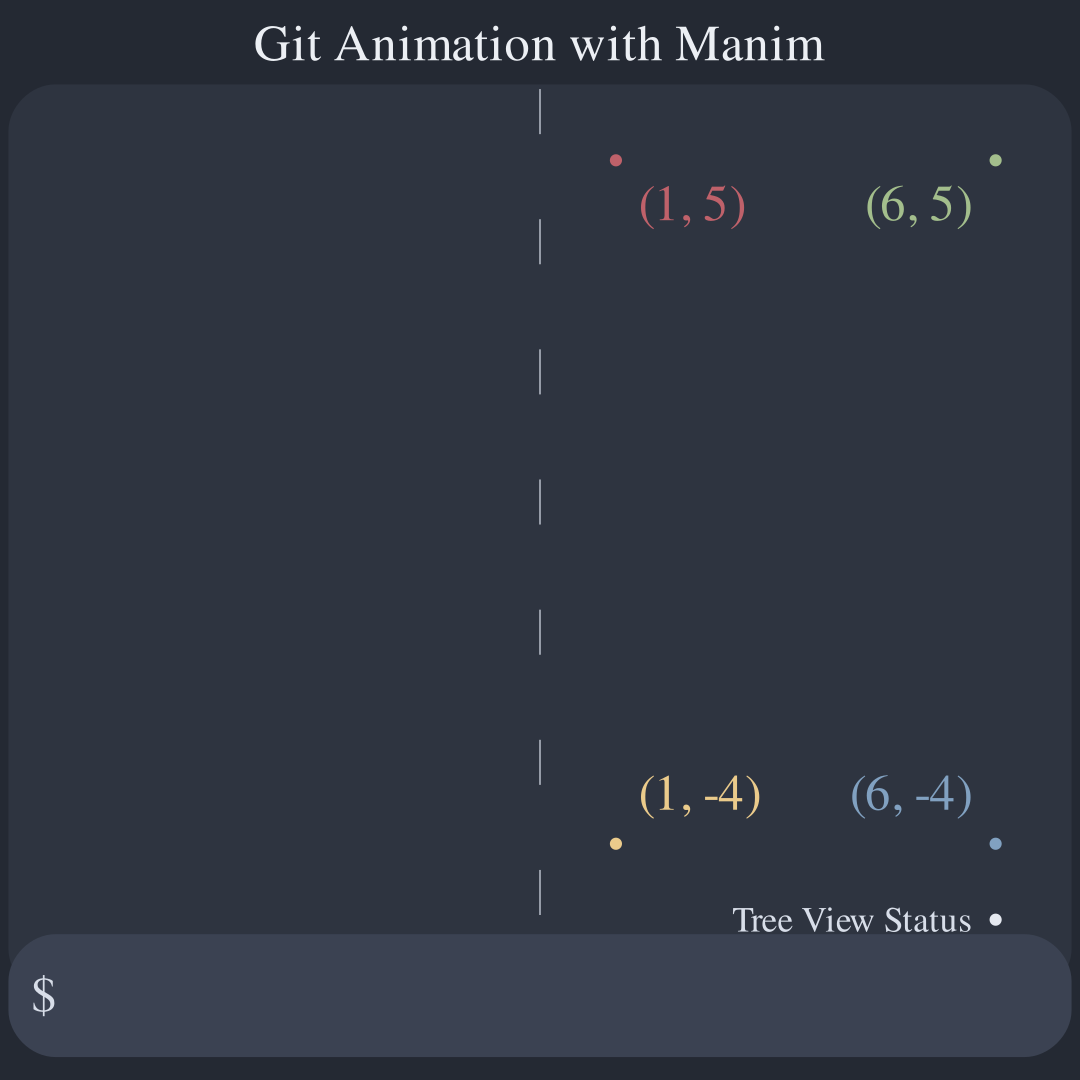

In [140]:
%%manim GitInit

class GitInit(Scene):
    def initial_frame_objects(self):
        frame_objects = []
        frame_objects.append(
            Rectangle(
                height=config.frame_height,
                width=config.frame_height,
                stroke_width=0,
                stroke_color=None,
                fill_color=nord_darkest_black,
                fill_opacity=1.0,
            )
        )

        frame_objects.append(
            RoundedRectangle(
                corner_radius=0.618,
                height=12.0,
                width=14.0,
                fill_color=nord_darker_black,
                stroke_width=0,
                fill_opacity=1.0,
            )
        )

        frame_objects.append(
            RoundedRectangle(
                color=nord_dark_black,
                stroke_width=0,
                fill_color=nord_dark_black,
                fill_opacity=1.0,
                corner_radius=0.618,
                height=1.618,
                width=14.0,
            ).shift(DOWN * 6)
        )

        frame_objects.append(
            DashedLine(
                start=[0, 5.9382, 0],
                end=[0, -4.9382, 0],
                stroke_width=1.618,
                dash_length=0.618,
                dashed_ratio=0.382,
                color=nord_dark_white,
            )
        )

        frame_objects.append(
            Text(
                "Git Animation with Manim",
                color=nord_light_white,
                disable_ligatures=False,
            )
            .to_edge(UP)
            .shift(UP * 0.1618)
        )

        return frame_objects

    def press_enter(self, current_command, consequence, how=FadeIn, flash=True):
        self.wait(0.3)
        enter_char = Text("↵", color=nord_light_white).next_to(current_command, RIGHT)
        self.wait(0.3)
        self.play(AddTextLetterByLetter(enter_char))
        self.play(enter_char.animate.scale(0.8), run_time=0.35)
        self.play(enter_char.animate.scale(1.3), run_time=0.35)
        self.play(FadeOut(enter_char, run_time=0.3), how(consequence), run_time=1)

        if flash:
            self.play(
                Flash(
                    consequence,
                    color=nord_light_white,
                    rate_func=rush_from,
                    line_length=0.2,
                    time_width=0.1,
                    flash_radius=max(
                        consequence.get_boundary_point(RIGHT)
                        - consequence.get_boundary_point(LEFT)
                    ),
                )
            )
            
    def debug_dots(self):
        coordinates = [
            [1, 5, 0],
            [6, 5, 0],
            [1, -4, 0],
            [6, -4, 0],
        ]

        colors = [
            nord_red,
            nord_green,
            nord_yellow,
            nord_blue,
        ]

        directions = [
            RIGHT + DOWN,
            LEFT + DOWN,
            RIGHT + UP,
            LEFT + UP,
        ]

        dots = [
            Dot(coordinate, color=color)
            for coordinate, color in zip(coordinates, colors)
        ]

        texts = [
            Text(f"{tuple(coordinate[:-1])}", color=color).next_to(dot, direction)
            for coordinate, color, dot, direction in zip(
                coordinates, colors, dots, directions
            )
        ]
        
        return dots, texts

    def construct(self):
        pixel_height = config["pixel_height"]
        pixel_width = config["pixel_width"]
        frame_width = pixel_width
        frame_height = pixel_height

        for obj in self.initial_frame_objects():
            self.add(obj)

        directory_anchor = Dot([1, 5, 0], color=None)
        command_anchor = Dot([-7, -6, 0], color=nord_red)
        command_sign = Text("$", color=nord_dark_white).next_to(command_anchor, RIGHT)
        self.add(command_sign)
        
        debug = True
        if debug:
            dots, texts = self.debug_dots()
            for dot,text in zip(dots, texts):
                self.add(dot)
                self.add(text)

        left_subtitle_anchor = Dot([-6, -5, 0], color=nord_white)
        right_subtitle_anchor = Dot([6, -5, 0], color=nord_white)

        self.add(right_subtitle_anchor)

        right_subtitle_text = Text("Tree View Status", color=nord_dark_white).scale(0.7).next_to(right_subtitle_anchor, LEFT)
        self.add(right_subtitle_text)


